## Gabriel Akio Urakawa - 11795912
## Lucas Xavier Leite - 10783347

Projeto - Etapa 1  
SCC0252 - Visualização Computacional (2023)
Profa Maria Cristina Ferreira de Oliveira

#Introdução


Foi escolhido o database do IMBD TOP1000 fornecido pela professora. Uma vez que os dados foram baixados, realizamos o upload em repositório pessoal do GitHub e realizamos o trabalho. Primeiramente observamos os dados e fizemos um pré-processamento de dados pelo que achamos cabível.

In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# obtencao da base de dados do kaggle que foi colocada no github
!pip install wget
import wget
if not os.path.isfile('imdb_top_1000.csv'):
  !python3 -m wget https://raw.githubusercontent.com/GabrielAkioUrakawa/Visualizacao-Computacional/main/archive/imdb_top_1000.csv

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=eb899ba88a16d3a9f0746089c468caca05a53a0dcefc9248387afb9e97da1f17
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget

Saved under imdb_top_1000.csv


#Pré-procesamento

Usando um df.info() observamos que, em primeiro momento, haviam 3 colunas que haviam valores invalidos para nossas visualizações (Certificate, Meta_score e Gross), percebemos também que a receita (Gross), a data de lançamento e o tempo de filme (Runtime) estavam em tipo de dado inadequados. Além disso, os valores da coluna Genre está agrupada de forma inadequada pra visualização e será manipulada posteriormente

In [3]:
# preprocessamento de dados
df = pd.read_csv('./imdb_top_1000.csv', encoding='latin-1')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


Realizando as devidas alterações, verificamos a existência de algum valor repetido ou inválido. No caso de valores inválidos, decidimos criar um novo dataframe chamado dfClean para armazenar os dados limpos. Assim, escolheríamos entre usar df e dfClean de acordo com os dados utilizados em cada visualização. Além disso, consideramos as colunas Certificate, Overview e Poster_Link como irrelevantes para nossa aplicação e, assim, "dropamos", ou removemos, as três colunas.

In [4]:
df['Gross'] = df['Gross'].replace(',','', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce', downcast='integer')
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce', downcast='integer')
df['Runtime'] = df['Runtime'].replace(" min",'', regex=True)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce', downcast='integer')

print(df.duplicated().values.any())
print(df.isna().values.any())

df = df.drop(['Certificate'], axis=1)
df = df.drop(['Overview'], axis=1)
df = df.drop(['Poster_Link'], axis=1)

dfClean = df.dropna()

False
True


In [5]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 0 to 997
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   749 non-null    object 
 1   Released_Year  749 non-null    float64
 2   Runtime        749 non-null    int16  
 3   Genre          749 non-null    object 
 4   IMDB_Rating    749 non-null    float64
 5   Meta_score     749 non-null    float64
 6   Director       749 non-null    object 
 7   Star1          749 non-null    object 
 8   Star2          749 non-null    object 
 9   Star3          749 non-null    object 
 10  Star4          749 non-null    object 
 11  No_of_Votes    749 non-null    int64  
 12  Gross          749 non-null    float64
dtypes: float64(4), int16(1), int64(1), object(7)
memory usage: 77.5+ KB


#Visualização

### Quantidade de filmes por ano

Primeiramente observamos a distribuição dos lançamentos de filmes mais populares do site por ano de lançamento.

Observamos um aumento considerável no número de filmes produzidos nas últimas décadas.

[Text(0.5, 1.0, 'Quantidade de filmes por ano'),
 Text(0.5, 0, 'Ano de lançamento'),
 Text(0, 0.5, 'Quantidade')]

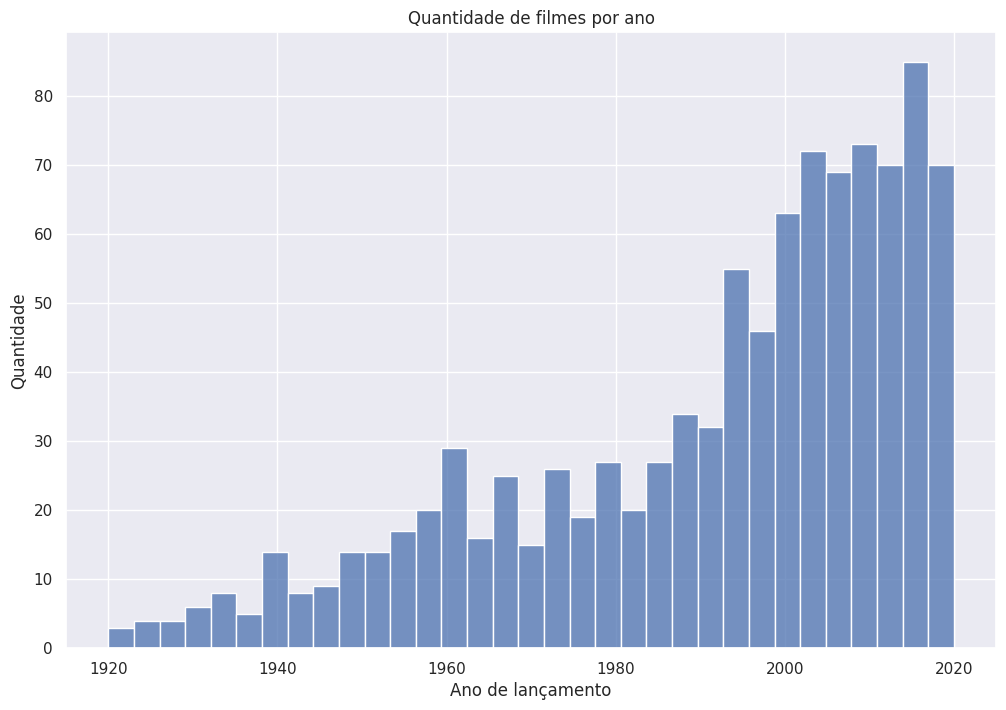

In [6]:
# sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(12, 8)})

gg = sns.histplot(data=df, x='Released_Year', binwidth=3)
gg.set(title='Quantidade de filmes por ano', xlabel='Ano de lançamento', ylabel='Quantidade')

Apenas por questões de comparação, plotamos o mesmo gráfico utilizando o dfClean em vez do df.

[Text(0.5, 1.0, 'Quantidade de filmes por ano'),
 Text(0.5, 0, 'Ano de lançamento'),
 Text(0, 0.5, 'Quantidade')]

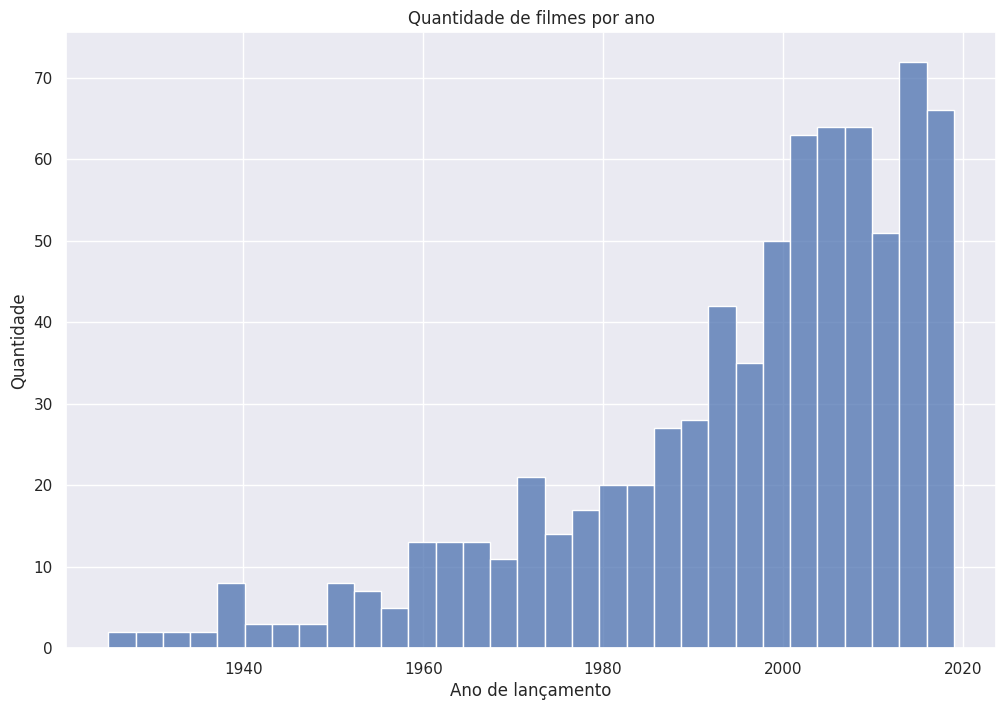

In [7]:
gg = sns.histplot(data=dfClean, x='Released_Year', binwidth=3)
gg.set(title='Quantidade de filmes por ano', xlabel='Ano de lançamento', ylabel='Quantidade')

### Quantidade de filmes por ano e gênero

Em seguida, pensamos em ver a mesma distribuição acima, mas com a diferenciação do gênero de cada filme lançado. Para isso, criamos um novo dataframe (movies_genres) que possui os generos de forma individual, ao invés do padrão (gênero 1, gênero 2, gênero 3, ...).

Usando um gráfico de barras empilhadas, podemos observar, ainda que de forma não tão precisa, a proporção entre a quantidade de filmes produzidos em cada gênero.

[Text(0.5, 1.0, 'Quantidade de filmes por ano e gênero'),
 Text(0.5, 0, 'Ano de lançamento'),
 Text(0, 0.5, 'Quantidade')]

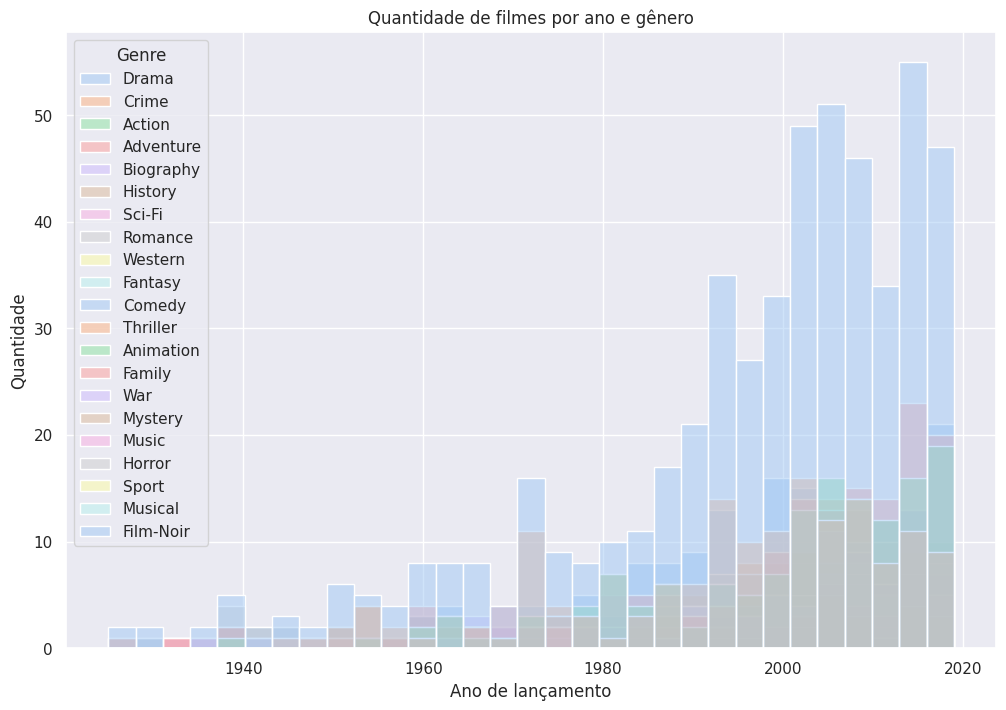

In [8]:
movies_genres = dfClean.drop('Genre', axis=1).join(dfClean.Genre.str.split(", ", expand=True).stack().reset_index(drop=True, level=1).rename('Genre'))

gg = sns.histplot(data=movies_genres, x='Released_Year', binwidth=3,  hue='Genre', palette='pastel')
gg.set(title='Quantidade de filmes por ano e gênero', xlabel='Ano de lançamento', ylabel='Quantidade')

### Avaliação x Receita

A seguir, plotamos a relação entre a avaliação no Metacritic (Meta_score) e a receita dos filmes.

Algo interessante que podemos observar é que filmes com avaliações muito altas (acima de 90) não costumam ter receitas mais altas do que aqueles que recebem uma avaliação um pouco mais baixa (entre 70 e 90). Na maior parte dos, a receita adquirida por esses filmes é apenas mediana.

É notável também que, em geral, filmes mais antigos possuem receita mais baixa e os mais bem avaliados costumam ser os filmes mais antigos.

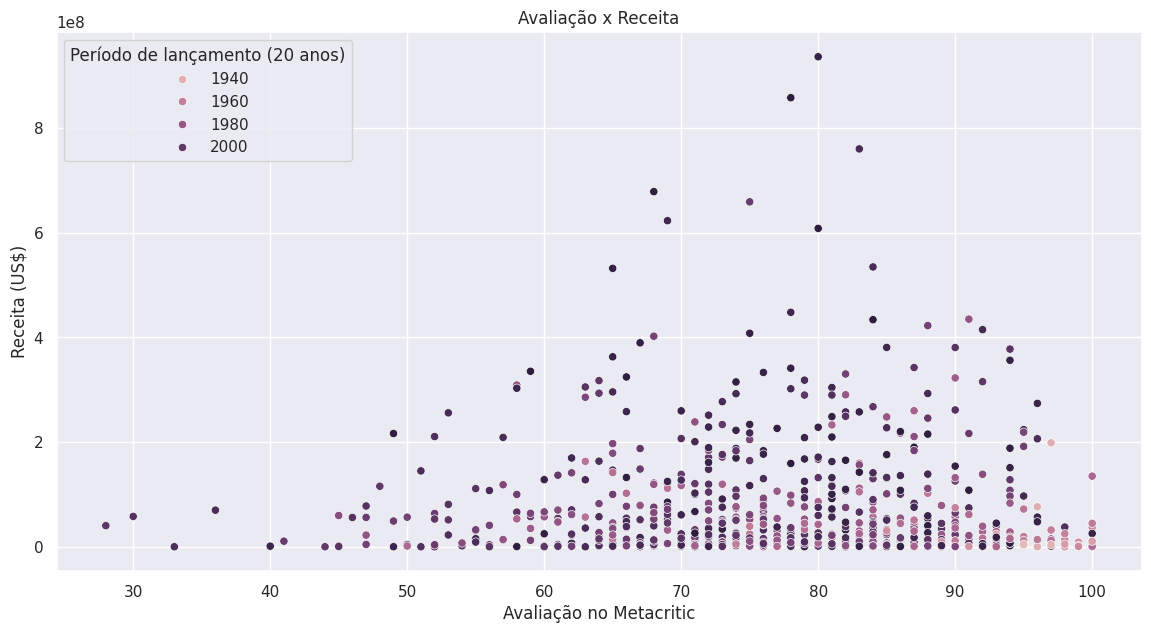

In [9]:
sns.set_theme(rc={'figure.figsize':(14, 7)})
g3 = sns.scatterplot(data=dfClean, x='Meta_score', y='Gross', hue='Released_Year')
g3.set(title = 'Avaliação x Receita', xlabel='Avaliação no Metacritic', ylabel='Receita (US$)')
g3.legend(title='Período de lançamento (20 anos)')

### Quantidade de filmes por diretor e por gênero

Para a próxima visualização, tinhamos como objetivo plotar um histograma que mostrasse uma relação entre gênero produzido e os diretores. Para isso, precisamos realizar mais um processamento nos dados, fixando um número de filmes mínimo que o diretor teria que possuir, e obtendo assim um novo dataframe associando cada filme produzido pelo diretor e seus gêneros.

Visto que nosso objetivo é, mais uma vez, mostrar a relação entre os dados observados, usamos novamente um gráfico de barras empilhadas para essa visualização. Com ela, podemos observar, por exemplo, a preferência de Steven Spielberg por filmes que contém o gênero terror, assim como a popularidade do gênero entre os diretores mais bem sucedidos.

É importante observar que em casos de filmes que contenham mais de um gênero, como comédia e romance, ambos são computados para a visualização.

In [10]:
number_of_movies = 20
dfPlot1 = movies_genres
ddc = dfPlot1[['Director', 'Series_Title']].groupby('Director').count() # get movie count by director
directors = np.array(ddc[ddc['Series_Title'] >= number_of_movies].index)
dfPlot1 = dfPlot1[dfPlot1['Director'].isin(directors)] # filter directors by movie count

unique_movies = dfPlot1[['Series_Title', 'Director']].drop_duplicates()
display(unique_movies[unique_movies['Director'].isin(unique_movies['Director'].unique())])
display(dfPlot1[['Series_Title', 'Director']].drop_duplicates().groupby('Director').count().max())

,Series_Title,Director
2,The Dark Knight,Christopher Nolan
6,Pulp Fiction,Quentin Tarantino
7,Schindler's List,Steven Spielberg
8,Inception,Christopher Nolan
9,Fight Club,David Fincher
...,...,...
862,The Birds,Alfred Hitchcock
879,Once Upon a Time... in Hollywood,Quentin Tarantino
890,Bridge of Spies,Steven Spielberg
951,Minority Report,Steven Spielberg


Series_Title    13
dtype: int64

[Text(0.5, 1.0, 'Quantidade de filmes por diretor e por gênero'),
 Text(0.5, 0, 'Diretor'),
 Text(0, 0.5, 'Quantidade de filmes')]

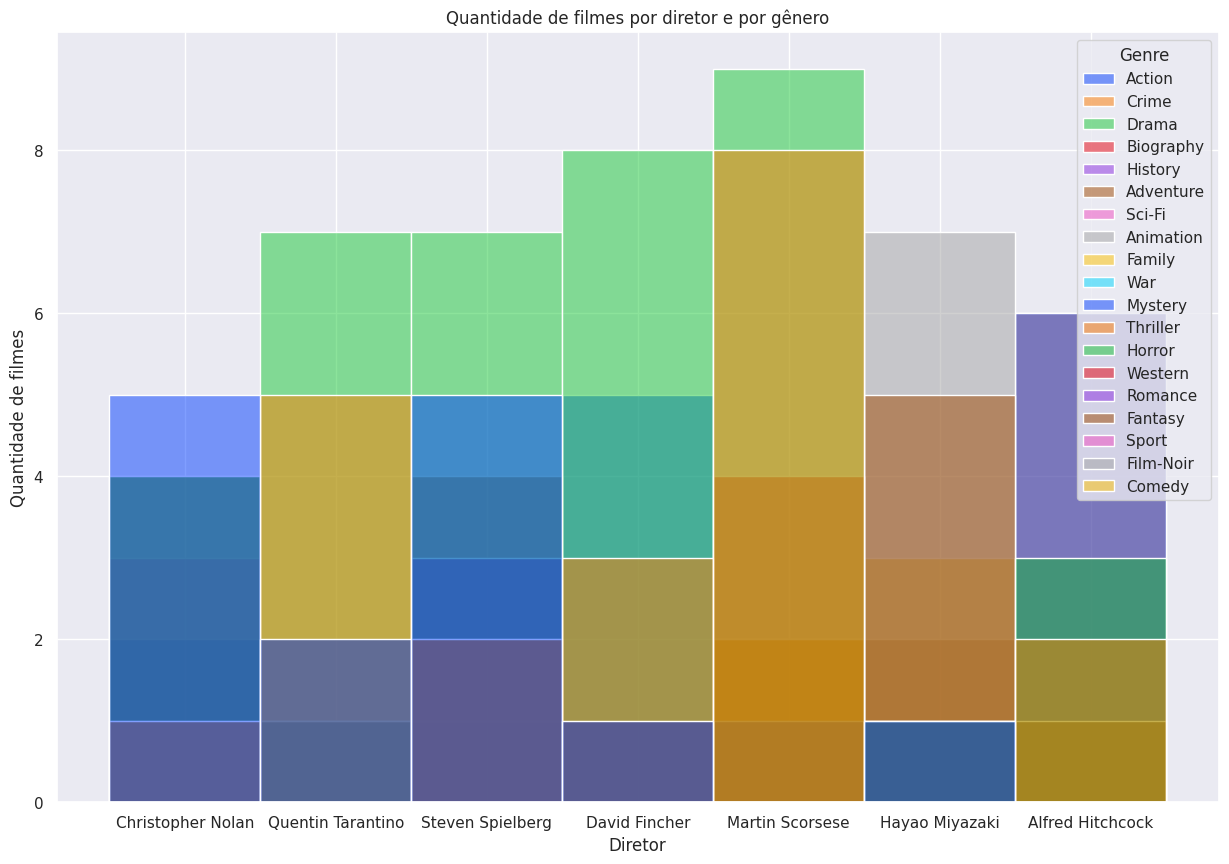

In [11]:
sns.set_theme(rc={'figure.figsize':(15, 10)})

g = sns.histplot(data=dfPlot1, x='Director', hue='Genre', palette='bright')
g.set(title = 'Quantidade de filmes por diretor e por gênero', xlabel='Diretor', ylabel='Quantidade de filmes')

### Receita de filmes por diretor e por gênero

Utilizando os mesmo dados, mas obtendo também a receita de cada filme, criamos um gráfico de barras agrupadas que mostra a receita dos filmes produzidos por esses diretores de acordo com seu gênero.

Nosso objetivo era observar se havia um gênero mais lucrativo que os demais para todos os diretores selecionados, mas não foi possível concluir a existência desse gênero, que é diferente para cada diretor.

Ao invés disso, fica clara a disparidade entre a receita de alguns diretores como Christopher Nolan e Alfred Hitchcock, por exemplo. Também é possível observar que alguns diretores exploram uma variedade de gêneros muito maior do que outros, como Martin Scorsese, que possui preferência por alguns genêros específicos.

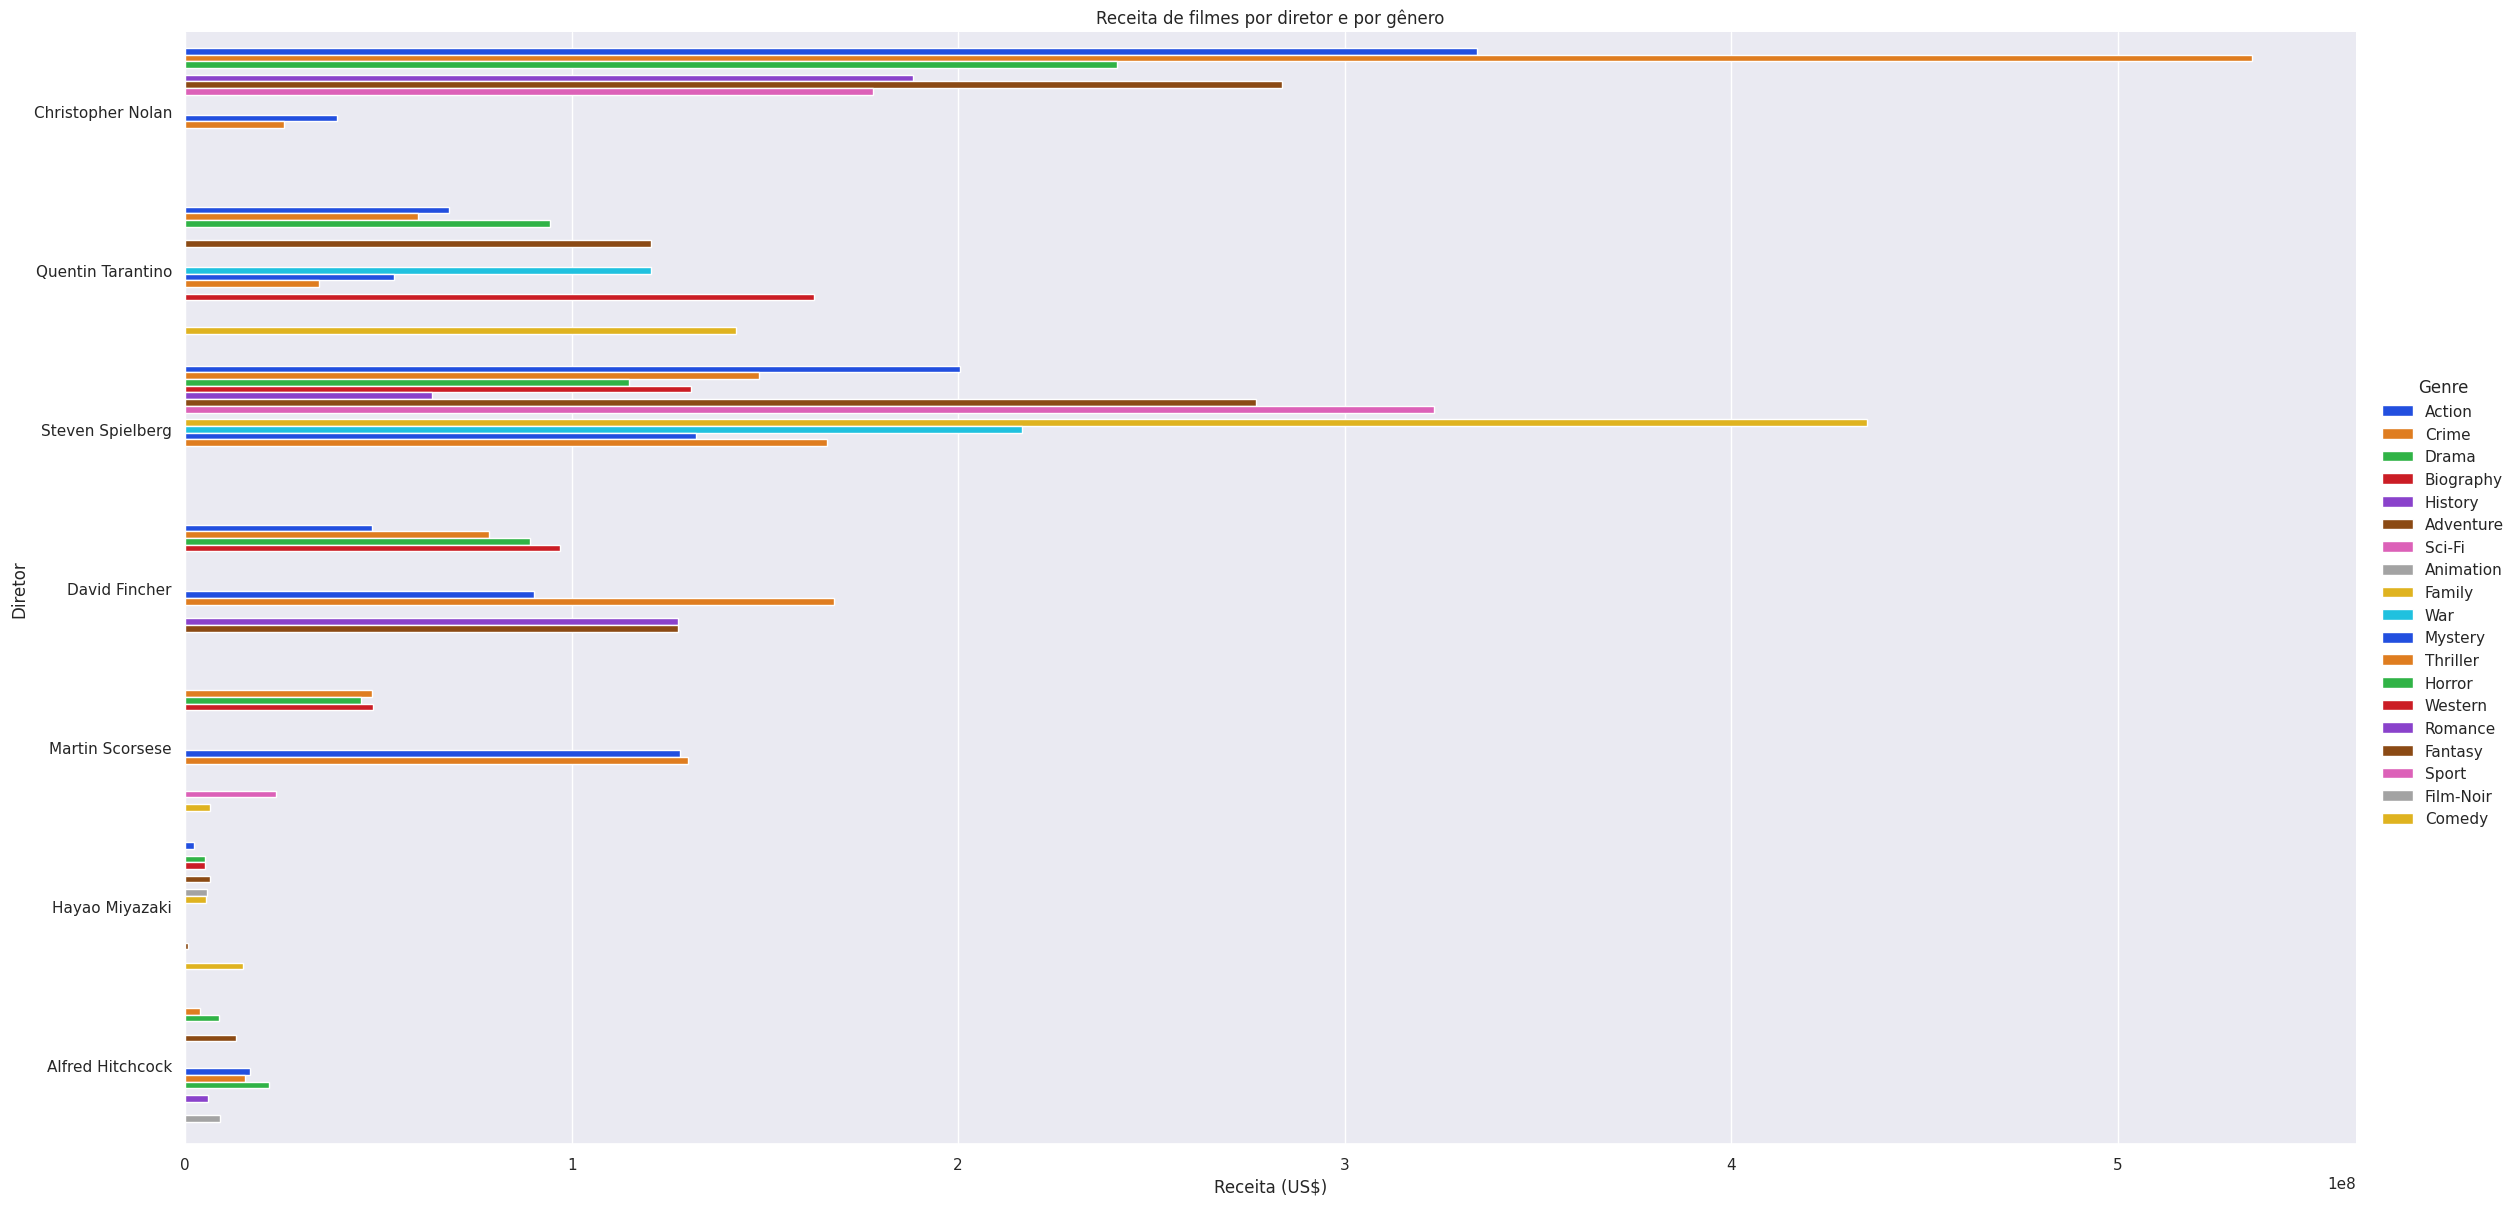

In [12]:
g2 = sns.catplot(data=dfPlot1, x='Gross', y='Director', hue='Genre', kind='bar', errorbar=None, height=12, aspect=2, palette='bright')
g2.set(title = 'Receita de filmes por diretor e por gênero', xlabel='Receita (US$)', ylabel='Diretor')

### Receita de filmes por gênero ao longo do tempo

Para a próxima visualização, buscamos mostrar a evolução da receita dos filmes produzidos ao longo dos anos, de acordo com seus gêneros. Para obter um gráfico mais claro, selecionamos apenas alguns dos gêneros mais comuns.

Podemos concluir que o gênero de ação alcançou os maiores picos, enquanto o gênero de romance está sempre em baixa, com apenas alguns picos ocasionais.


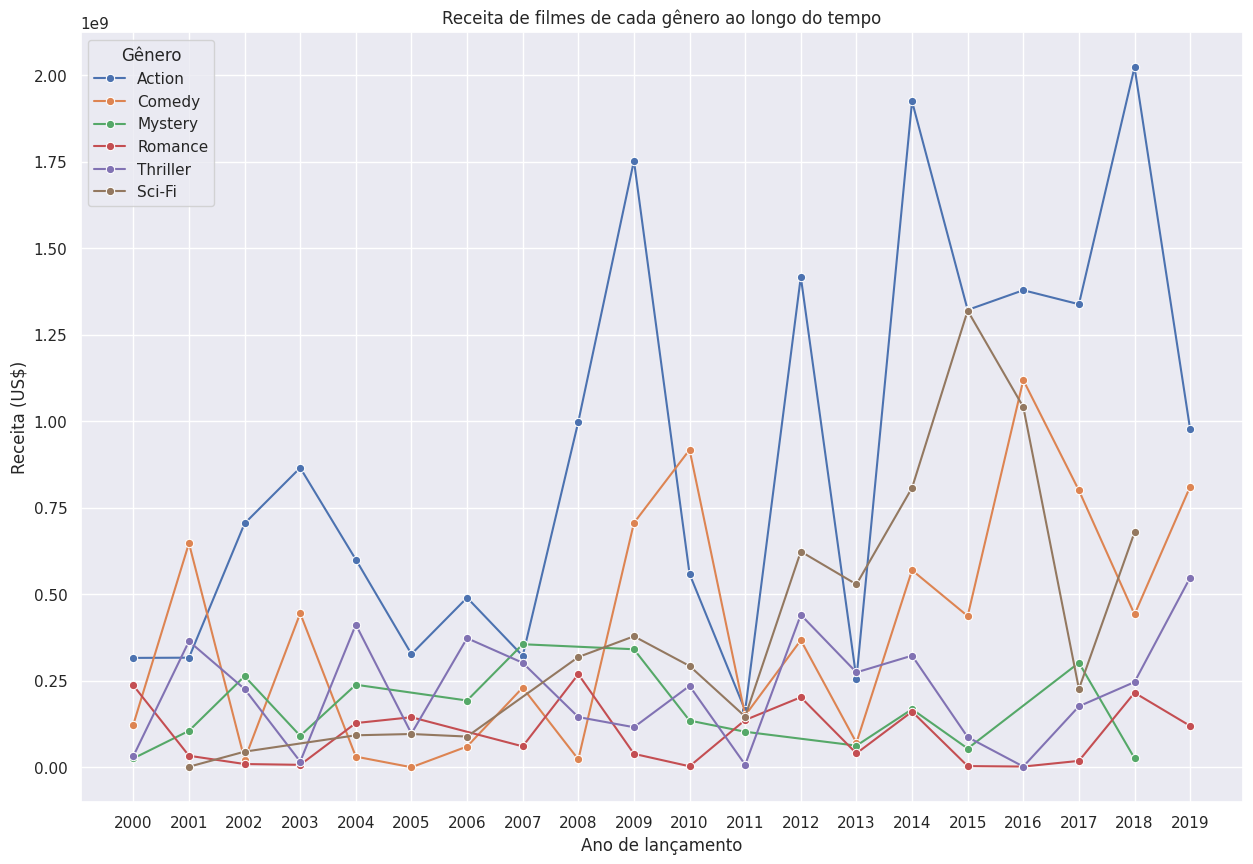

In [13]:
genres = ['Action', 'Mystery', 'Sci-Fi', 'Thriller', 'Comedy', 'Romance']
movies_genres['Released_Year'] = pd.to_numeric(movies_genres['Released_Year'], errors='raise', downcast='integer')
selected_genres = movies_genres[(movies_genres['Genre'].isin(genres)) & (movies_genres['Released_Year'] >= 2000)].groupby(['Released_Year', 'Genre']).sum('Gross')

g4 = sns.lineplot(data=selected_genres, x='Released_Year', y='Gross', hue='Genre', estimator=None, marker='o')
g4.set_xticks(range(2000, 2020))
g4.set(title = 'Receita de filmes de cada gênero ao longo do tempo', xlabel='Ano de lançamento', ylabel='Receita (US$)')
g4.legend(title='Gênero')

### Receita média de filmes por gênero e ano

Finalmente, queremos visualizar a receita média de acordo com o ano de lançamento. Para acomodar a visualização, selecionamos apenas alguns gêneros de filmes. Com as duas informações em mãos, optamos por criar um mapa de calor (heatmap) da receita média de cada gênero escolhido de acordo com o ano de lançamento.

In [14]:
pd.set_option('display.max_rows', 10)
movies_genres = dfClean.drop('Genre', axis=1).join(dfClean.Genre.str.split(", ", expand=True)).rename(columns={0: 'Genre 1', 1: 'Genre 2', 2: 'Genre 3'})
movies_genres = movies_genres.drop('Genre 3', axis=1).dropna()
display(movies_genres)

,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre 1,Genre 2
1,The Godfather,1972.0,175,9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime,Drama
2,The Dark Knight,2008.0,152,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action,Crime
3,The Godfather: Part II,1974.0,202,9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime,Drama
4,12 Angry Men,1957.0,96,9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime,Drama
5,The Lord of the Rings: The Return of the King,2003.0,201,8.9,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,GiÃ¹ la testa,1971.0,157,7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690.0,Drama,War
991,Kelly's Heroes,1970.0,144,7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435.0,Adventure,Comedy
992,The Jungle Book,1967.0,78,7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612.0,Animation,Adventure
994,A Hard Day's Night,1964.0,87,7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0,Comedy,Music


Na parte de dados, usamos o dfClean para selecionar os gêneros escolhidos arbitrariamente e, a partir disso, estruturamos em uma matriz os dados do heatmap, organizando por gênero e ano, e calculando sua média.

In [15]:
movies_genres = dfClean.drop('Genre', axis=1).join(dfClean.Genre.str.split(", ", expand=True)).rename(columns={0: 'Genre 1', 1: 'Genre 2', 2: 'Genre 3'})
movies_genres = movies_genres[['Genre 1','Genre 3','Genre 2', 'Released_Year', 'Gross']]
genres =  ['Action', 'Mystery', 'Sci-Fi', 'Thriller', 'Comedy', 'Romance']
years = np.array(movies_genres.loc[movies_genres['Released_Year']>= 2000, 'Released_Year'].unique(), dtype=np.int64)
years.sort()

heatmap_matrix = np.zeros((len(genres), len(years)))
for i in range(len(genres)):
  for j in range(len(years)):
    aux = movies_genres.loc[((movies_genres['Genre 1'] == genres[i]) | (movies_genres['Genre 2'] == genres[i]) | (movies_genres['Genre 3'] == genres[i])) & (movies_genres['Released_Year'] == years[j]), 'Gross'].mean()
    if math.isnan(aux):
      heatmap_matrix[i][j] = 0
    else:
      heatmap_matrix[i][j] = aux
heatmap_df = pd.DataFrame(heatmap_matrix, columns = years, index = genres)

Com essa última visualização, podemos observar que gêneros como ação e ficcão científica alcançaram receitas consideravelmente mais altas que os demais. Outro detalhe que podemos observar é que, em todos os gêneros, a receita média cresceu consideravelmente a partir do ano de 2008, com exceção eventuais baixas e do gênero de romance, que mais uma vez, demonstra baixos valores de receita.

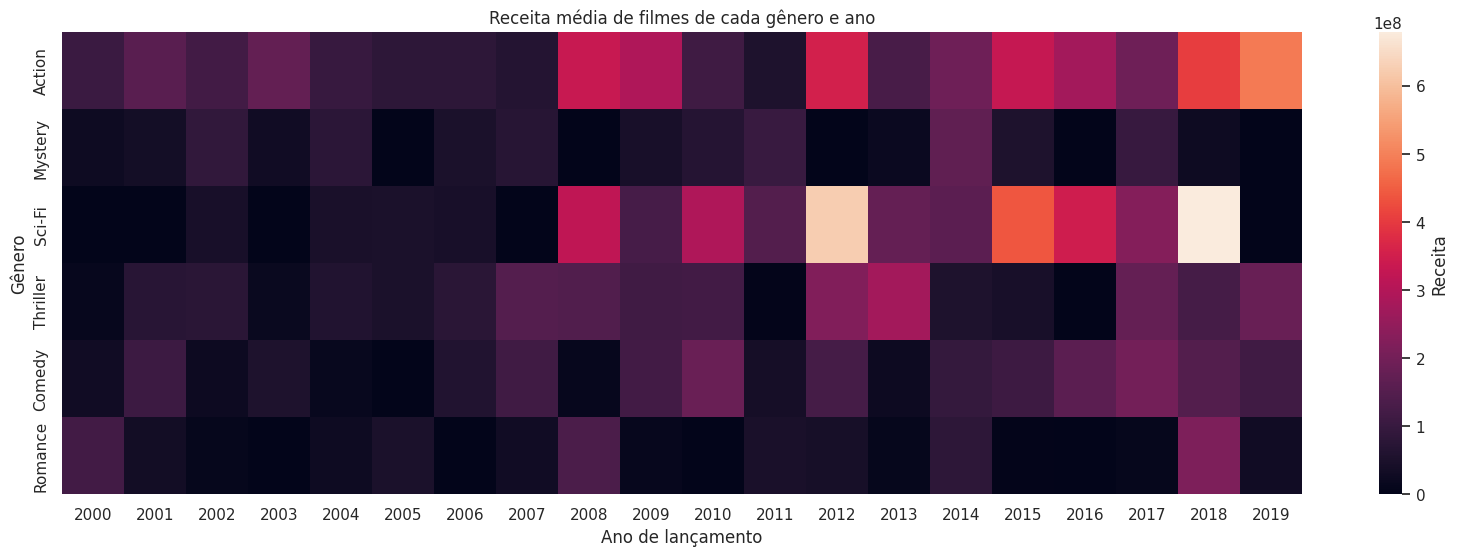

In [16]:
sns.set_theme(rc={'figure.figsize':(len(years), len(genres))})

hm = sns.heatmap(data = heatmap_df)
hm.set(title = 'Receita média de filmes de cada gênero e ano', xlabel='Ano de lançamento', ylabel='Gênero')
hm.collections[0].colorbar.set_label('Receita')